# TP 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
T = 3 #sec
p = 4000
N = 2*p

In [66]:
Fe = N/T

## Exercice 1 - Son Sinusoidal

1) Générer un tableau contenant l’échantillonnage d’une fonction sinusoidale à 440 pulsations (périodes) par seconde pendant 3 secondes.

In [87]:
t = np.linspace(0, T, N)
ω = 2*np.pi*440 #pulsation/sec
signal = np.sin(ω*t)

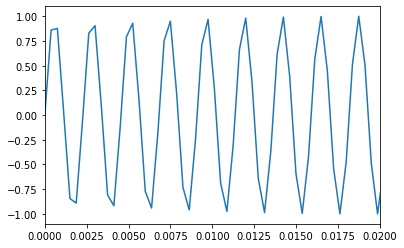

In [122]:
plt.plot(t, signal)
plt.xlim((0, 0.02))
plt.show()

2) On rappelle que la transformée de Fourier discrète d'un signal $f$ à $N$ échantillons permet d'obtenir ses coordonnées dans la base $\left(\omega^{k}\right)_{-\frac{N}{2}<k \leq \frac{N}{2}}$, avec $\omega_{n}^{k}=e^{-2 i k \pi \frac{n}{N}}$. Avec ces notations, le mode associé au coefficient $\gamma_{k}^{N}(f)$ est, par définition, l'indice $k$.

In [89]:
gamma = (1/N)*np.fft.fft(signal)

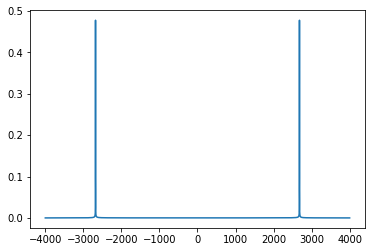

In [123]:
plt.plot(np.arange(-N/2, N/2), np.abs(gamma))

On a bien $TF(\sin \left(2 \pi \cdot f_{0} \cdot t+\varphi_{0}\right)) = $
$\frac{1}{2j} \times \left(\mathrm{e}^{\mathrm{j} \cdot \varphi_{0}} \cdot \delta\left(f-f_{0}\right)-\mathrm{e}^{-\mathrm{j} \cdot \varphi_{0}} \cdot \delta\left(f+f_{0}\right)\right)$

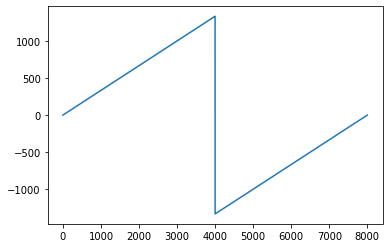

In [81]:
plt.plot(np.fft.fftfreq(N, 1/Fe)) #Permet d'associée les f et les N. En x les f et en y les N. N->f

In [111]:
n_to_f = np.fft.fftfreq(N, 1/Fe)

3) Représenter le module de la FFT du signal en ordonnée en fonction des fréquences en abscisse.

In [148]:
gamma_shifted


array([-7.13094775e-05+1.11022302e-19j, -7.13094810e-05-2.80031705e-08j,
       -7.13094918e-05-5.60063562e-08j, ...,
       -7.13095097e-05+8.40095764e-08j, -7.13094918e-05+5.60063562e-08j,
       -7.13094810e-05+2.80031705e-08j])

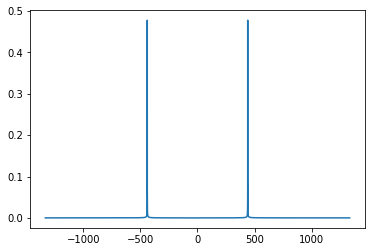

In [106]:
gamma_shifted = (1/N)*np.fft.fftshift(np.fft.fft(signal))

plt.plot(np.fft.fftshift(n_to_f), np.abs(gamma_shifted)) #On a bien f = 440 Hz

4) Même question en remplaçant le signal sinusoidal par un signal carré (on pourra utiliser l'expression $\operatorname{sign}(\sin x)$, qui renvoie un signal carré de période $2 \pi$, compris entre $-1$ et $1$).

(0.0, 20.0)

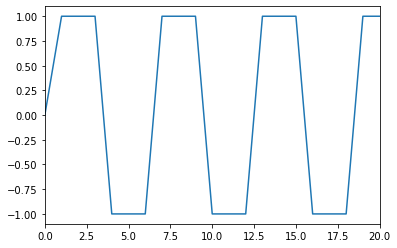

In [139]:
signal_carre = np.sign(signal)
plt.plot(signal_carre)
plt.xlim((0, 20))

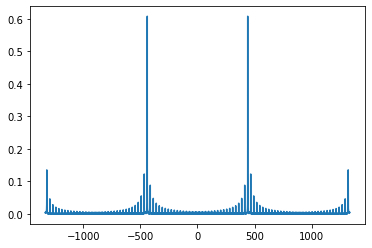

In [141]:
plt.plot(np.fft.fftshift(np.fft.fftfreq(N, 1/Fe)), np.abs((1/N)*np.fft.fftshift(np.fft.fft(signal_carre)))) #On a bien f = 440 Hz
# plt.xlim((-10, 10))

5) Même question en remplaçant le signal sinusoidal par un signal triangulaire (on pourra utiliser l'expression $\frac{2}{\pi} \arcsin (\sin x)$, qui renvoie un signal triangulaire de période $2 \pi$, compris entre $-1$ et $1$).

(0.0, 100.0)

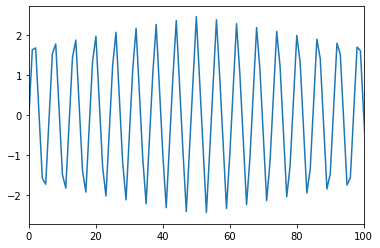

In [149]:
signal_triang = (np.pi/2)*np.arcsin(signal)
plt.plot(signal_triang)
plt.xlim(0, 100)

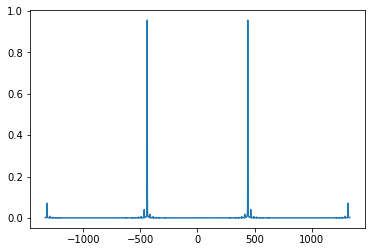

In [143]:
plt.plot(np.fft.fftshift(np.fft.fftfreq(N, 1/Fe)), 
        np.abs((1/N) * np.fft.fftshift(np.fft.fft(signal_triang))))  # On a bien f = 440 Hz
# plt.xlim((-10, 10))


## Exercice 2 – Visualisation de la transformée de Fourier discrète.

1) En utilisant la commande subplot de Python, écrire un programme permettant de visualiser dans 4 fenêtres un signal $S$, la partie réelle de $f f t(S)$, la partie imaginaire de $f f t(S)$ et le module de $f f t(S)$.

In [280]:

def visualisation(N, Fe, signal, xlim=None):
    fig, axs = plt.subplots(4, 1, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    freq_shifted = np.fft.fftshift(np.fft.fftfreq(N, 1/Fe))
    signal_fft_shifted = (1/Fe) * np.fft.fftshift(np.fft.fft(signal))

    # Partie Reel
    axs[0].plot(freq_shifted, np.real(signal_fft_shifted))
    axs[0].set_xlim((-100, 100))
    # Partie Imaginaire
    axs[1].plot(freq_shifted, np.imag(signal_fft_shifted))

    # Module
    axs[2].plot(freq_shifted, np.abs(signal_fft_shifted))

    # Signal
    axs[3].plot(signal)
    if xlim:
        axs[3].set_xlim(xlim)


    plt.show()

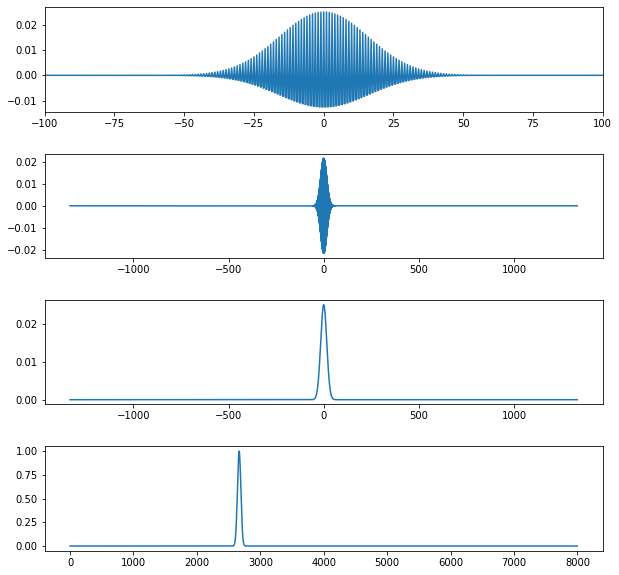

In [281]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    
signal_gaussian = gaussian(t, 1, 0.01)
visualisation(N, Fe, signal_gaussian)


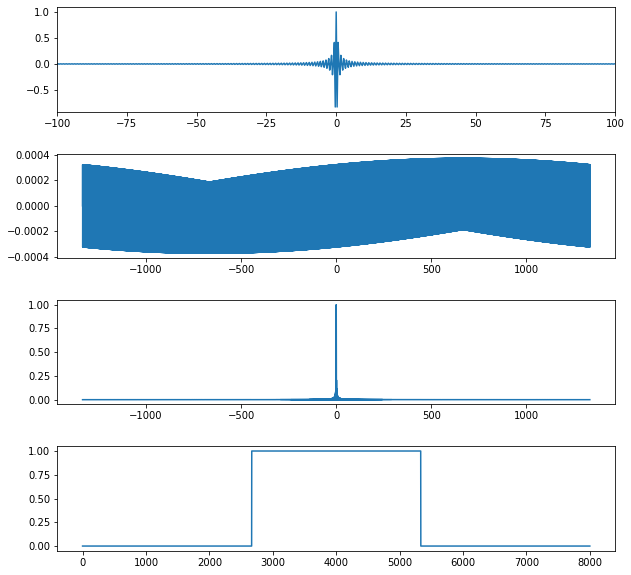

In [282]:
def indicatrice_I(t, a, b):
    return (t>a) & (t<b)

signal_indicatrice = indicatrice_I(t, 1, 2)
visualisation(N, Fe, signal_indicatrice)


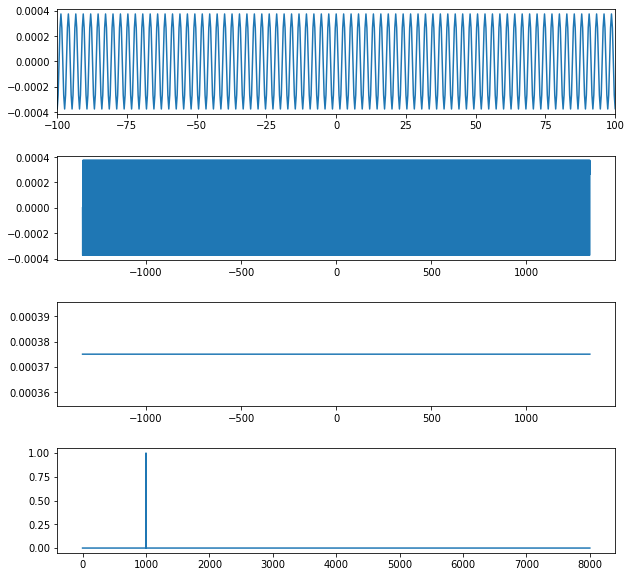

In [283]:
def dirac(t, indice):
    t_out = np.zeros_like(t)
    t_out[indice] = 1
    return t_out

signal_dirac = dirac(t, 1000)
visualisation(N, Fe, signal_dirac)


In [290]:
t

array([0.00000000e+00, 3.75046881e-04, 7.50093762e-04, ...,
       2.99924991e+00, 2.99962495e+00, 3.00000000e+00])

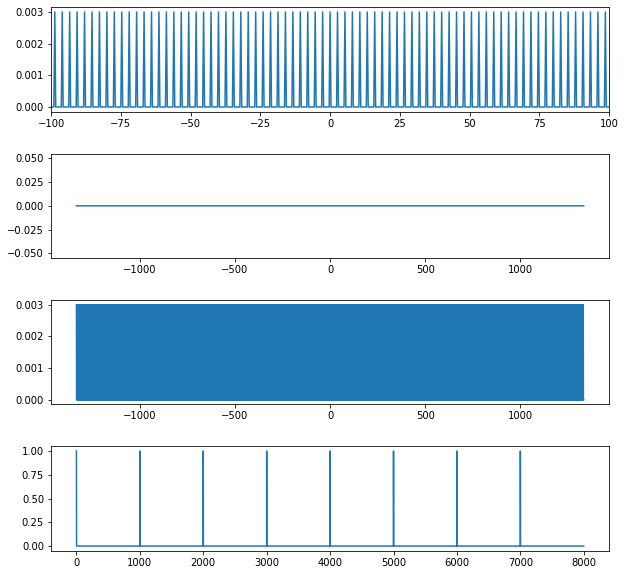

In [293]:
def peigne_dirac(t, rec):
    t_out = np.zeros_like(t)
    N = t.size
    for indice in range(N//rec):
        t_out += dirac(t, indice*rec)
    return t_out


signal_peigne_dirac = peigne_dirac(t, 1000)
visualisation(N, Fe, signal_peigne_dirac)


## Exercice 3 – Phénomène de Gibbs.

1) Construire un signal représentant la fonction de Heaviside échantillonnée à un pas $h$ sur un intervalle de temps $[-T, T]$. Représenter le diagramme énergie-fréquence et le comparer avec le diagramme théorique.

In [296]:
h = 2*T/N
t = np.linspace()

In [297]:
t


array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])

## 2 Convolution de deux signaux

La convolution de deux signaux se calcule comme suit :
$$
>>S=\operatorname{real}\left(\text { ifft }\left(f f t\left(S_{1}\right) . * f f t\left(S_{2}\right)\right)\right)
$$

## Exercice 4 – Visualisation du produit de convolution.


1) Ecrire un programme permettant de visualiser simultanément sur deux colonnes et trois lignes, pour deux signaux $S_{1}$ et $S_{2}:$ les signaux $S_{1}$ et $S_{2}$, le produit de convolution $S_{1} * S_{2}, f f t\left(S_{1}\right), f f t\left(S_{2}\right)$ et $f f t\left(S_{1} * S_{2}\right)$.

In [303]:
def convolve(S1, S2):
    S = np.real(np.fft.ifftn(np.fft.fft(S1) * np.fft.fft(S2)))
    return S

def visualisation_conf(S1, S2, N, Fe):
    fig, axs = plt.subplots(3, 2, figsize=(20, 30))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    S1convS2 = convolve(S1, S2)

    freq_shifted = np.fft.fftshift(np.fft.fftfreq(N, 1/Fe))
    signal1_fft_shifted = (1/Fe) * np.fft.fftshift(np.fft.fft(S1))
    signal2_fft_shifted = (1/Fe) * np.fft.fftshift(np.fft.fft(S2))
    S1convS2_fft_shifted = (1/Fe) * np.fft.fftshift(np.fft.fft(S1convS2))
    
    # Signal 1
    axs[0][0].plot(S1)
    # Signal 2
    axs[0][1].plot(S2)

    axs[1][0].plot(S1convS2)

    # Module
    axs[1][1].plot(freq_shifted, np.abs(signal1_fft_shifted))
    axs[2][0].plot(freq_shifted, np.abs(signal2_fft_shifted))
    axs[2][1].plot(freq_shifted, np.abs(S1convS2_fft_shifted))
    plt.show()


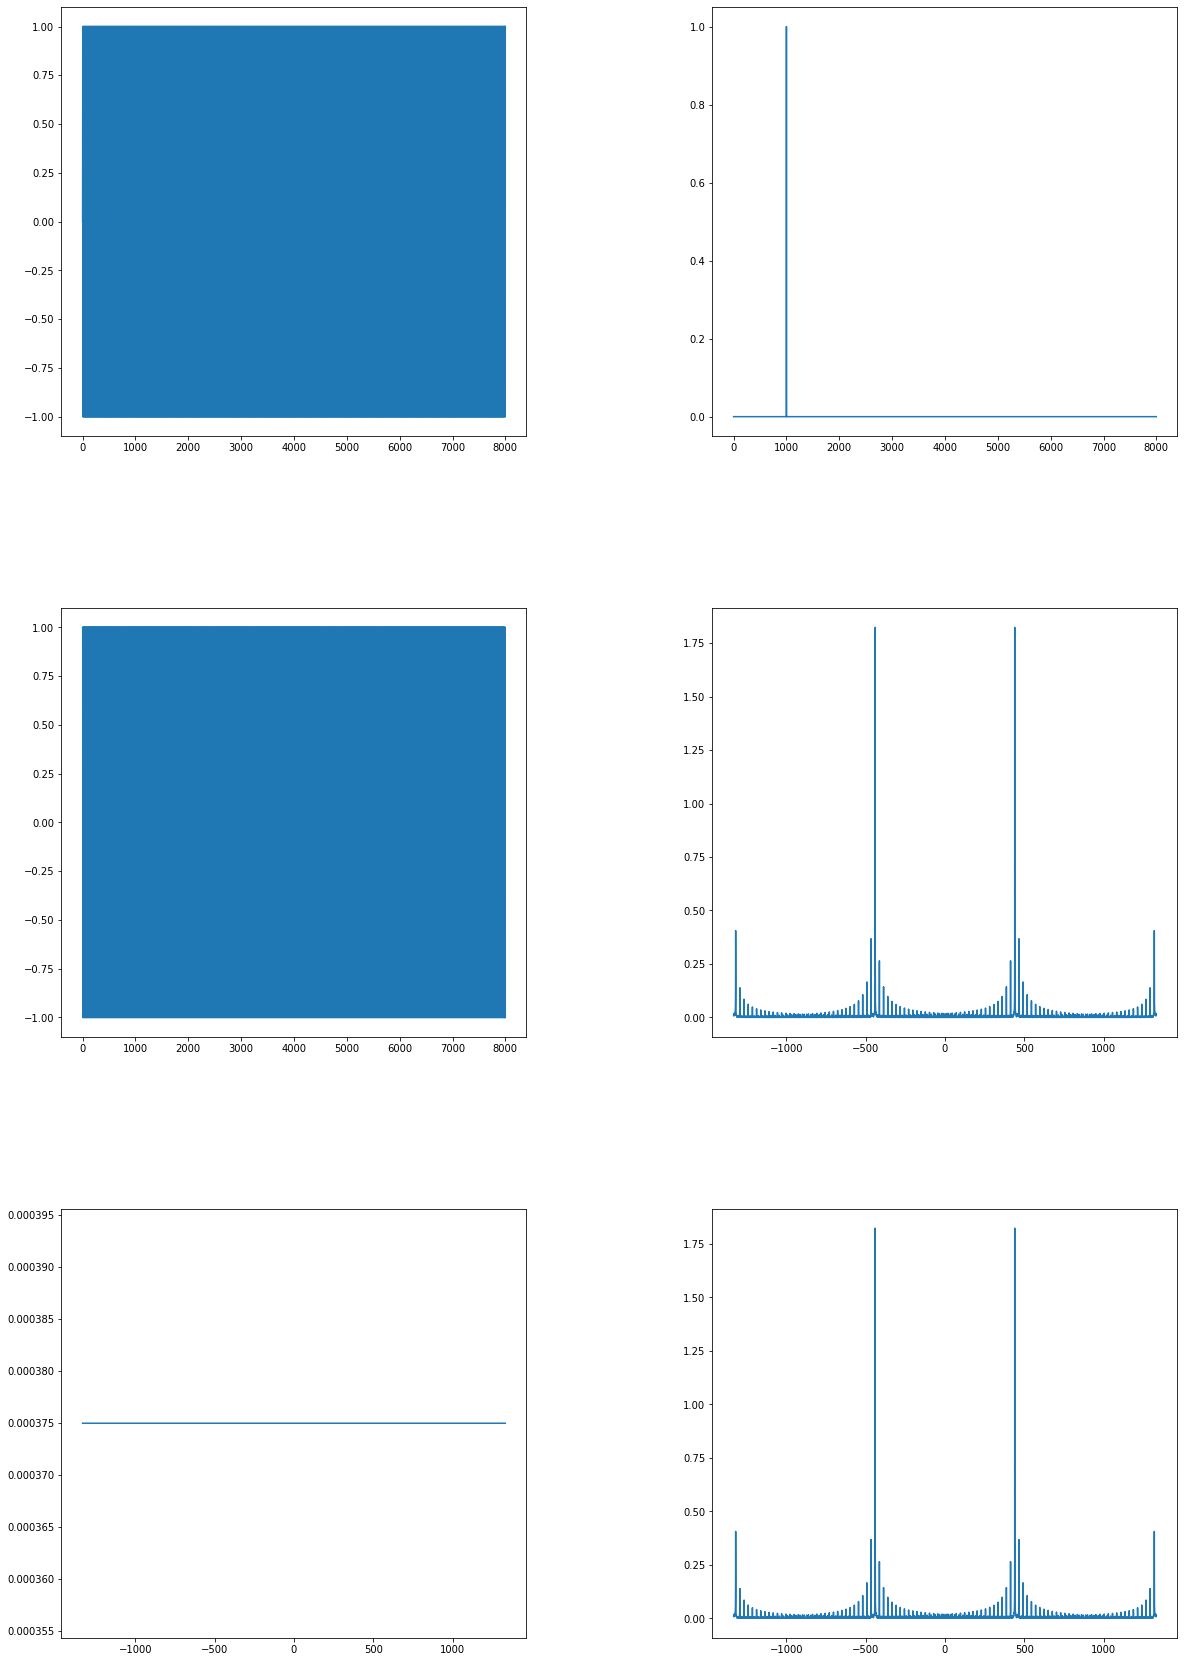

In [304]:
visualisation_conf(signal_carre, signal_dirac, N, Fe)


# 3 Echantillonnage

In [308]:
signal.shape

(8000,)

In [309]:
signal_ech = signal[np.arange(0, signal.size, 10)]
signal_ech.shape


(800,)

In [327]:
def echantillone_visualise(signal, p_list):
    N = signal.size
    fig, axs = plt.subplots(2, len(p_list)+1, figsize=(10, 10))
    freq_shifted = np.fft.fftshift(np.fft.fftfreq(N, 1/Fe))
    signal_fft_shifted = (1/N) * np.fft.fftshift(np.fft.fft(signal))

    axs[0][0].set_title("Signal d'origine")
    axs[0][0].plot(signal)
    axs[1][0].plot(freq_shifted, signal_fft_shifted)

    for i, p in enumerate(p_list):
        signal_ech = signal[np.arange(0, N, p)]

        freq_ech_shifted = np.fft.fftshift(np.fft.fftfreq(N//p, 1/Fe))
        signal_ech_fft_shifted = (1/(N//p)) * np.fft.fftshift(np.fft.fft(signal_ech))

        axs[0][i+1].set_title(f"Signal {p}")
        axs[0][i+1].plot(signal)
        axs[1][i+1].plot(freq_ech_shifted, signal_ech_fft_shifted)



/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


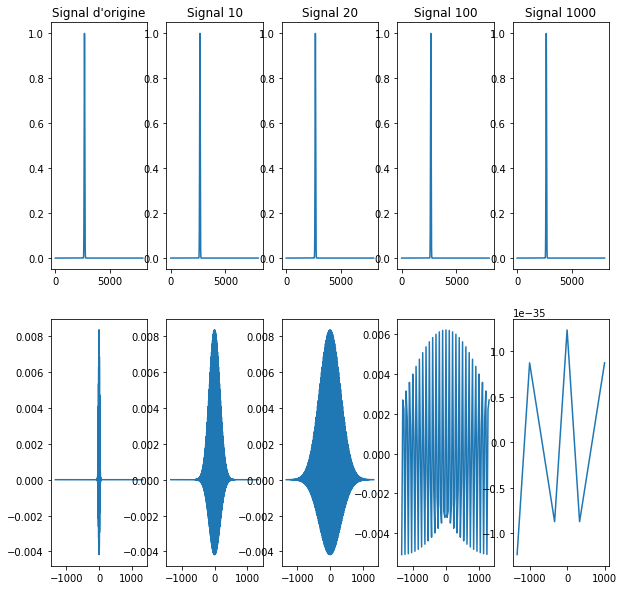

In [328]:
echantillone_visualise(signal_gaussian, [10, 20, 100, 1000])

/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


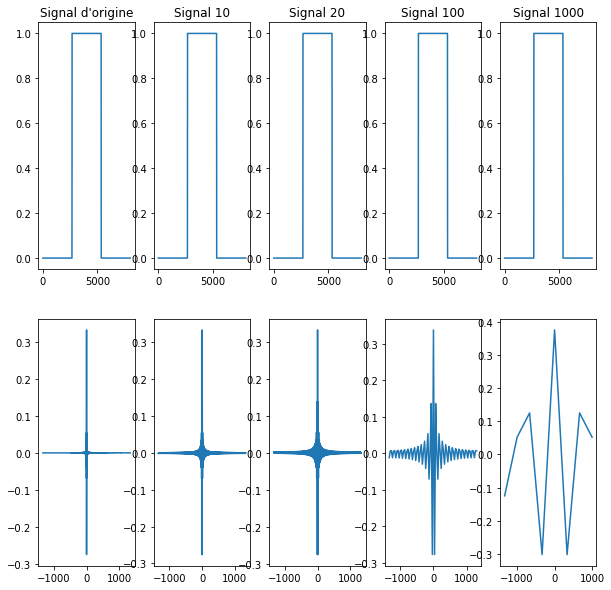

In [329]:
echantillone_visualise(signal_indicatrice, [10, 20, 100, 1000])


In [333]:
#https://en.wikipedia.org/wiki/Whittaker%E2%80%93Shannon_interpolation_formula

def reconstruction(signal_ech, Fe):
    pass
